In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("incomes.csv")

In [4]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


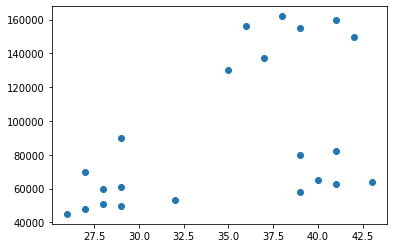

In [7]:
plt.scatter(df["Age"],df["Income($)"])

In [8]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [10]:
y_predicted=km.fit_predict(df[["Age","Income($)"]])


In [11]:
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [12]:
df["clusters"]=y_predicted

In [13]:
df.head()

,Name,Age,Income($),clusters
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


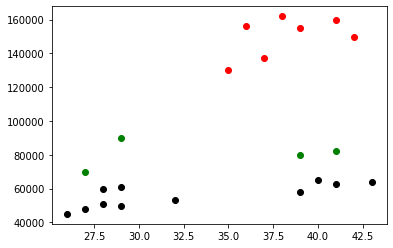

In [35]:
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]
df3 = df[df.clusters==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

In [16]:
#Here the problem is centroid

In [36]:
scaler=MinMaxScaler()

In [39]:
scaler.fit(df[["Income($)"]])

MinMaxScaler()

In [41]:
df["Income($)"]=scaler.transform(df[["Income($)"]])

In [43]:
df.head()

,Name,Age,Income($),clusters
0,Rob,27,0.213675,0
1,Michael,29,0.384615,0
2,Mohan,29,0.136752,2
3,Ismail,28,0.128205,2
4,Kory,42,0.897436,1


In [44]:
scaler.fit(df[["Age"]])
df["Age"]=scaler.transform(df[["Age"]])

In [45]:
df.head()

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [51]:
km=KMeans(n_clusters=3)

In [52]:
y_predicted=km.fit_predict(df[["Age","Income($)"]])

In [53]:
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [54]:
df["clusters"]=y_predicted

In [55]:
df.head()

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [56]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

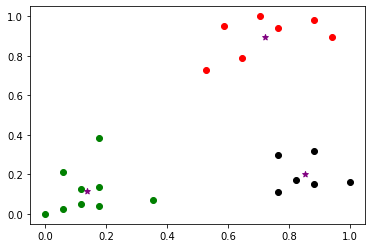

In [60]:
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]
df3 = df[df.clusters==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="Purple",marker="*")

In [61]:
#Elbow method

In [65]:
sse=[]
k_rng=range(1,10)
for k in range(1,10):
    km=KMeans(n_clusters=k)
    km.fit(df[["Age","Income($)"]])
    sse.append(km.inertia_)

In [67]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2664030124668416,
 0.22395807059250125,
 0.17299621932455464,
 0.13781880133764024,
 0.10497488680620906]

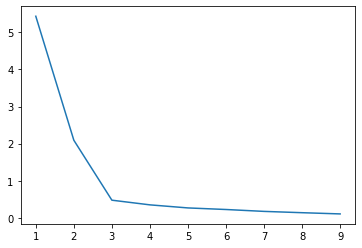

In [69]:
plt.plot(k_rng,sse)